# Capstone Project 2: GPCR research trend
## Natural Language Processing of a domain specific literature
***
### Topic modeling: Convert word_class relationship from clustering to dictionary

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter

In [2]:
# clustering of words used 35 clusters
word_class = pd.read_csv('./topic_modeling/model_saved/word_topic35_counts_2.csv').drop('Unnamed: 0',axis=1)
word_class.head()

,word,topic,count
0,what,22,2229
1,we,25,145112
2,know,25,23453
3,and,25,2264012
4,do_not,25,44377


In [3]:
word_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272544 entries, 0 to 272543
Data columns (total 3 columns):
word     272542 non-null object
topic    272544 non-null int64
count    272544 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.2+ MB


In [5]:
# change dataframe to dictionary with words as keys and topic class as values
# create word_count dictionary from dataframe with words as keyws and count as values
word_topic = {}
word_count = {}
for i in tqdm(range(word_class.shape[0])):
    word_topic[word_class.iloc[i]['word']] = word_class.iloc[i]['topic']
    word_count[word_class.iloc[i]['word']] = word_class.iloc[i]['count']

100%|██████████| 272544/272544 [03:13<00:00, 1409.43it/s]


In [6]:
# check conversion
word_topic['we'],word_count['we']

(25, 145112)

### Load preprocessed dataframe

In [7]:
# table with id, text as fourgram
df4 = pd.read_csv('./Processed_data/Id_fourgram.csv').drop('Unnamed: 0',axis=1)
df4.head()

,Id,fourgram
0,24877594,what we know and do_not know_about the cannabi...
1,16889837,allosteric agonist of 7tm receptor expand the ...
2,31068464,mrgprx4 be a g_protein_couple receptor activat...
3,30610192,modulation of gpr39 a g_protein_couple recepto...
4,30289386,simulation of spontaneous g_protein activation...


In [9]:
# table with id, year, keyword,affiliation
df = pd.read_csv('./Processed_data/year_text_keywords_affiliation.csv').drop('Unnamed: 0',axis=1)
df = df.drop('text',axis=1)
df.head()

,Id,year,keywords,affiliation
0,24877594,2014.0,cannabinoid receptor 2 ; endocannabinoid ; i...,[]
1,16889837,2006.0,NaN,glaxosmithkline
2,31068464,2019.0,mrgprx4 ; bile acid ; cholestasis ; itch ; p...,[' the johns hopkins university']
3,30610192,2019.0,NaN,"[' oregon national primate research center, or..."
4,30289386,2018.0,g protein ; markov state model ; allostery ;...,[' washington university']


### Assign top10 topics to each record

In [11]:
topics = pd.read_csv('./topic_modeling/model_saved/topic35.csv').drop('Unnamed: 0',axis=1)
topics.head()

,topic,term
0,0,airway_inflammation
1,1,muscarinic acetylcholine adrenoceptor
2,2,dompaine serotonin
3,3,structural
4,4,inflammation cytokine


In [84]:
# change topic term to dictionary
topic_term = {}
for topic in range(topics.shape[0]):
    topic_term[topic] = topics.iloc[topic]['term']

In [12]:
useless_topics = [18,25]

In [25]:

def predict_topic(text):
    """
    return top10 topics in the text
    use word_topic as global variable
    """
    words = text.split()
    topic_counts = Counter()
    for word in words:
        if word in word_topic:
            topic_counts[word_topic[word]] += 1
        
    top10 = list(dict(topic_counts.most_common(10)).keys())
    if 18 in top10:
        top10.remove(18)
    if 25 in top10:
        top10.remove(25)
        
    return top10    

In [26]:
%%time
paper_topics = df4['fourgram'].apply(predict_topic)


CPU times: user 39 s, sys: 105 ms, total: 39.1 s
Wall time: 39.4 s


In [27]:
df4['topics'] = paper_topics
df4.to_csv('./topic_modeling/model_saved/Id_fourgram_topics.csv')

In [28]:
df4.head()

,Id,fourgram,topics
0,24877594,what we know and do_not know_about the cannabi...,"[22, 16, 11, 10]"
1,16889837,allosteric agonist of 7tm receptor expand the ...,"[22, 14, 4, 17, 12, 10, 3, 20]"
2,31068464,mrgprx4 be a g_protein_couple receptor activat...,"[22, 19, 5, 7, 20, 24, 3, 31]"
3,30610192,modulation of gpr39 a g_protein_couple recepto...,"[28, 22, 5, 24, 6, 29, 10, 31]"
4,30289386,simulation of spontaneous g_protein activation...,"[22, 17, 14, 29, 4, 0, 15, 20]"


### Assing topics to keywords

In [29]:
df_keywords = df[['Id','keywords']].dropna()

In [33]:
keywords = df_keywords['keywords'].apply(lambda x: x.replace('-',''))

In [34]:
keywords = keywords.apply(lambda x: x.split(';'))
keywords.head()

0     [  cannabinoid receptor 2 ,  endocannabinoid ,...
2     [  mrgprx4 ,  bile acid ,  cholestasis ,  itch...
4     [  g protein ,  markov state model ,  alloster...
10    [  knockout mouse ,  maltodextrin ,  psychophy...
12    [  gpcr signalling ,  g    protein  couple rec...
Name: keywords, dtype: object

In [43]:
def keyword_topic(keywords):
    """
    return topics for the keywords
    use word_topic as global variable
    """
    
    topic_counts = Counter()
    for word in keywords:
        word = '_'.join(word.split())
        if word in word_topic:
            topic_counts[word_topic[word]] += 1
        
    top10 = list(dict(topic_counts.most_common(10)).keys())
    if 18 in top10:
        top10.remove(18)
    if 25 in top10:
        top10.remove(25)
        
    return top10  

In [44]:
keyword_topic = keywords.apply(keyword_topic)

In [47]:
df_keywords['topics'] = keyword_topic
df_keywords.head()

,Id,keywords,topics
0,24877594,cannabinoid receptor 2 ; endocannabinoid ; i...,"[22, 21]"
2,31068464,mrgprx4 ; bile acid ; cholestasis ; itch ; p...,"[24, 5, 19, 3]"
4,30289386,g protein ; markov state model ; allostery ;...,"[17, 14]"
10,28768658,knockout mouse ; maltodextrin ; psychophysic...,"[28, 22]"
12,31219669,gpcr signalling ; g protein - couple rece...,"[22, 13]"


In [46]:
keyword_topic.head(5)

0           [22, 21]
2     [24, 5, 19, 3]
4           [17, 14]
10          [28, 22]
12          [22, 13]
Name: keywords, dtype: object

In [81]:
content_keywords_topics = df4[['Id','topics']].merge(df_keywords, 
                                                     left_on='Id',
                                                     right_on='Id',
                                                     how = 'right',
                                                     suffixes=('_text', '_keyword')
                                                    )

In [82]:
content_keywords_topics.head()

,Id,topics_text,keywords,topics_keyword
0,24877594,"[22, 16, 11, 10]",cannabinoid receptor 2 ; endocannabinoid ; i...,"[22, 21]"
1,31068464,"[22, 19, 5, 7, 20, 24, 3, 31]",mrgprx4 ; bile acid ; cholestasis ; itch ; p...,"[24, 5, 19, 3]"
2,30289386,"[22, 17, 14, 29, 4, 0, 15, 20]",g protein ; markov state model ; allostery ;...,"[17, 14]"
3,28768658,"[28, 7, 22, 17, 29, 4, 20, 5]",knockout mouse ; maltodextrin ; psychophysic...,"[28, 22]"
4,31219669,"[22, 13, 12, 28, 9, 17, 5, 0]",gpcr signalling ; g protein - couple rece...,"[22, 13]"


In [88]:
def convert_topic(topics):
    terms = []
    for topic in topics:
        terms.append(topic_term[topic])
    return terms
        
content_keywords_topics['topic_term_text'] = content_keywords_topics['topics_text'].apply(convert_topic)
content_keywords_topics['topic_term_keyword'] = content_keywords_topics['topics_keyword'].apply(convert_topic)
content_keywords_topics.head()

,Id,topics_text,keywords,topics_keyword,topic_term,topic_term_text,topic_term_keyword
0,24877594,"[22, 16, 11, 10]",cannabinoid receptor 2 ; endocannabinoid ; i...,"[22, 21]","[immune_response, cardiac, gene_polymorphism, ...","[immune_response, cardiac, gene_polymorphism, ...","[immune_response, psychiatric_disorder]"
1,31068464,"[22, 19, 5, 7, 20, 24, 3, 31]",mrgprx4 ; bile acid ; cholestasis ; itch ; p...,"[24, 5, 19, 3]","[immune_response, visual, genetic polymorphism...","[immune_response, visual, genetic polymorphism...","[gastrointestinal, genetic polymorphism, visua..."
2,30289386,"[22, 17, 14, 29, 4, 0, 15, 20]",g protein ; markov state model ; allostery ;...,"[17, 14]","[immune_response, anatomy, proliferation, bloo...","[immune_response, anatomy, proliferation, bloo...","[anatomy, proliferation]"
3,28768658,"[28, 7, 22, 17, 29, 4, 20, 5]",knockout mouse ; maltodextrin ; psychophysic...,"[28, 22]","[imaging, neurodegenerative_disease, immune_re...","[imaging, neurodegenerative_disease, immune_re...","[imaging, immune_response]"
4,31219669,"[22, 13, 12, 28, 9, 17, 5, 0]",gpcr signalling ; g protein - couple rece...,"[22, 13]","[immune_response, neural behavior, clinical, i...","[immune_response, neural behavior, clinical, i...","[immune_response, neural behavior]"


In [89]:
content_keywords_topics = content_keywords_topics.drop('topic_term',axis=1)

In [90]:
content_keywords_topics.to_csv('./topic_modeling/model_saved/contents_all.csv')

<h3>Calculate accuracy</h3>

<ol>
    <li> if topics in keyword hit topics in text, mark 1
    <li> calculate percentage of correct prediction

In [61]:
def accuracy(keywords,text):
    """
    calcuate accuracy
        if topics in keyword hit topics in text, mark 1
        calculate percentage of correct prediction
    """
    
    pos = 0
    for topic in keywords:
        if topic in text:
            pos += 1
    if len(keywords) > 0:
        score = pos/len(keywords)

        return score

In [62]:
scores = []
for row in tqdm(range(content_keywords_topics.shape[0])):
    scores.append(accuracy(content_keywords_topics['topics_keyword'].iloc[row],
                           content_keywords_topics['topics_text'].iloc[row]))

100%|██████████| 37845/37845 [00:01<00:00, 37074.41it/s]


In [63]:
len(scores),content_keywords_topics.shape

(37845, (37845, 3))

In [66]:
content_keywords_topics['score'] = scores
content_keywords_topics.head(10)

,Id,topics_text,topics_keyword,score
0,24877594,"[22, 16, 11, 10]","[22, 21]",0.5
1,31068464,"[22, 19, 5, 7, 20, 24, 3, 31]","[24, 5, 19, 3]",1.0
2,30289386,"[22, 17, 14, 29, 4, 0, 15, 20]","[17, 14]",1.0
3,28768658,"[28, 7, 22, 17, 29, 4, 20, 5]","[28, 22]",1.0
4,31219669,"[22, 13, 12, 28, 9, 17, 5, 0]","[22, 13]",1.0
5,24143969,"[17, 22, 0, 29, 9, 3, 20, 1]","[29, 14]",0.5
6,28949776,"[7, 22, 26, 34, 24, 15, 30, 17]","[7, 24, 22, 26]",1.0
7,25908257,"[22, 0, 9, 29, 7, 28]","[0, 29]",1.0
8,27830944,"[26, 22, 17, 0, 29, 16, 4]",[],NaN
9,26347659,"[34, 15, 22, 29, 28, 17, 20, 0]","[15, 34]",1.0


In [68]:
content_keywords_topics.to_csv('./topic_modeling/model_saved/content_keywords_topics_score.csv')

In [67]:
content_keywords_topics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37845 entries, 0 to 37844
Data columns (total 4 columns):
Id                37845 non-null int64
topics_text       37845 non-null object
topics_keyword    37845 non-null object
score             37049 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [71]:
final_accuracy = content_keywords_topics.score.dropna().mean()
final_accuracy

0.9253047872680074

# dummy model

In [7]:
scores = pd.read_csv('./topic_modeling/model_saved/content_keywords_topics_score.csv')
scores.head()

,Unnamed: 0,Id,topics_text,topics_keyword,score
0,0,24877594,"[22, 16, 11, 10]","[22, 21]",0.5
1,1,31068464,"[22, 19, 5, 7, 20, 24, 3, 31]","[24, 5, 19, 3]",1.0
2,2,30289386,"[22, 17, 14, 29, 4, 0, 15, 20]","[17, 14]",1.0
3,3,28768658,"[28, 7, 22, 17, 29, 4, 20, 5]","[28, 22]",1.0
4,4,31219669,"[22, 13, 12, 28, 9, 17, 5, 0]","[22, 13]",1.0


In [14]:
keywords = scores['topics_keyword'].apply(lambda x: x[1:-1].split(','))

In [35]:
import random
from tqdm import tqdm

dummy_score = []

for i in tqdm(range(scores.shape[0])):
    pos = 0
    n = []
    balls = list(range(33))
    for j in range(8):
        k = random.choice(balls)
        balls.remove(k)
        n.append(k)
        
    for key in keywords[i]:
        if len(key):
            if int(key) in n:
                pos += 1
    dummy_score.append(pos/len(keywords[i]))


100%|██████████| 37845/37845 [00:02<00:00, 17907.79it/s]


In [36]:
sum(dummy_score)/len(dummy_score)

0.222759774099438

### Keep in mind that the null accuracy will be very small as showed below 

In [79]:
# disctribution of text topic number
topic_number = content_keywords_topics['topics_text'].apply(lambda x: len(x))
topic_number.min(),topic_number.max(),topic_number.mean(), topic_number.mode()

(0, 9, 7.768635222618576, 0    8
 dtype: int64)

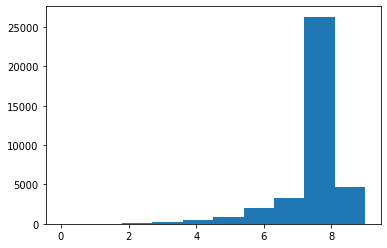

In [77]:
import matplotlib.pyplot as plt
plt.hist(topic_number)
plt.show()

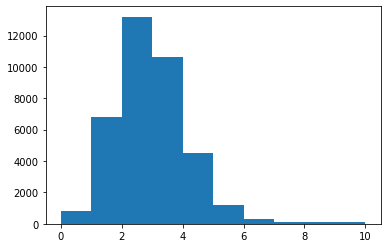

(0, 10, 2.4822301492931693, 0    2
 dtype: int64)

In [80]:
# distribution of keyword topic number
topic_number = content_keywords_topics['topics_keyword'].apply(lambda x: len(x))
plt.hist(topic_number)
plt.show()
topic_number.min(),topic_number.max(),topic_number.mean(), topic_number.mode()

<h3> Null accuracy </h3>
<h4> Pobability = for an average of 8 topics predicted in text from in total 33 (35-2) useful topics, 2 of them are accurately predicted </h4>
<ol>
    <li> problem equal to: probalility of from 33 balls (two of them red, all the rest are blue), pick up 8 balls and two of them are red.
    <li> This is hypergeometric distribution: P = C(2,2)*C(31,6)/C(33,8)
    <li> we could also use simulation


In [4]:
import random
from tqdm import tqdm

pos = 0
stop = 100000
for i in tqdm(range(stop)):
    n = []
    balls = list(range(33))
    for j in range(8):
        k = random.choice(balls)
        balls.remove(k)
        n.append(k)
        
    if 9 in n and 8 in n:
        pos += 1
    
pos/stop

100%|██████████| 100000/100000 [00:01<00:00, 81322.63it/s]


0.05309